# Step0: Env. setup
1. Dataset directory
2. Packages

In [18]:
# Dir
input_folder = './datasets' #Enter Input Folder
split_folder = './split_dataset' #Enter Output Folder

In [19]:
# Check tf version
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

print(f"Tensorflow version: {tf.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Tensorflow version: 2.10.0
Num GPUs Available:  1


# Step1: Preparation
1. Train-test split (Train:Test:Val = 7:2:1)
2. Training, testing ,validation dataset
3. Build CNN model (via `sequentail` methods)

## Train-Test data spilt

In [20]:
import splitfolders
splitfolders.ratio(input_folder, split_folder, seed=42, ratio=(0.7,0.2,0.1))

Copying files: 4317 files [00:01, 2537.02 files/s]


## Dataset setup

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   rotation_range = 40,
                                   width_shift_range= 0.2,
                                   height_shift_range= 0.2,)

training_set = train_datagen.flow_from_directory("./split_dataset/train/",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 seed=123,
                                                 class_mode = 'categorical')

Found 3019 images belonging to 5 classes.


In [22]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory("./split_dataset/val",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            seed=123,
                                            class_mode = 'categorical')

Found 860 images belonging to 5 classes.


In [23]:
final_datagen = ImageDataGenerator(rescale = 1./255)

final_set = final_datagen.flow_from_directory("./split_dataset/test/",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            seed=123,
                                            class_mode = 'categorical')

Found 438 images belonging to 5 classes.


## Build CNN model

In [24]:
# Buile CNN model
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=[64, 64, 3]))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(layers.Conv2D(32, (3,3), activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(layers.Dropout(0.2))
cnn.add(layers.Flatten())

cnn.add(layers.Dense(units=128, activation='relu'))
cnn.add(layers.Dense(units=5, activation='softmax'))

# Show the summary of the model
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)             

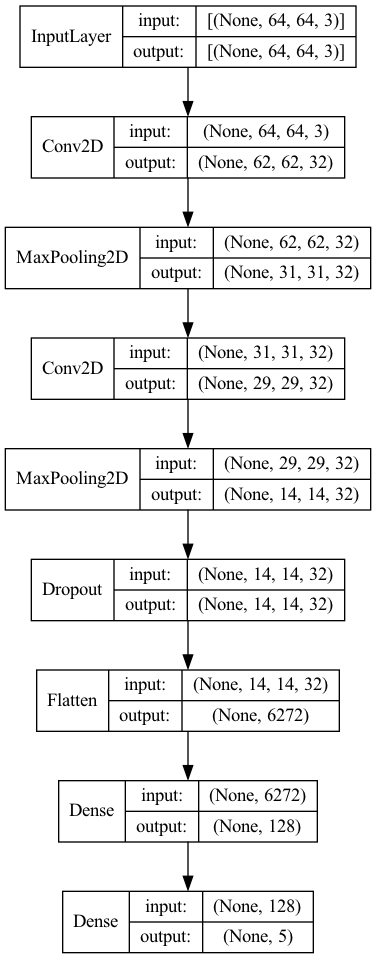

In [25]:
# Plotting model
from tensorflow.keras.utils import plot_model
from PIL import Image

plot_model(cnn, to_file='./cnn_model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96)
display(Image.open('./cnn_model.png'))

# Step2: CNN model training
1. Compile model with `optimizer`,`loss_function`,`training _log_metrics` & train model
3. Data visualization
4. Test for single picture

## Compile and tain the model

In [26]:
# Compile CNN model
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

# Train the model 
history = cnn.fit(training_set, 
                  epochs = 32,
                  validation_data = test_set)

# Accuracy
loss, accuracy= cnn.evaluate(final_set) # final_set: test set (10 percentage of the datasets)
print(f'Accuracy: {accuracy*100}')

Epoch 1/32


2023-03-21 10:40:04.001833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


95/95 [==============================] - ETA: 0s - loss: 1.3725 - accuracy: 0.3872

2023-03-21 10:40:11.884182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


95/95 [==============================] - 10s 99ms/step - loss: 1.3725 - accuracy: 0.3872 - val_loss: 1.1326 - val_accuracy: 0.5000
Epoch 2/32
95/95 [==============================] - 9s 95ms/step - loss: 1.1713 - accuracy: 0.5141 - val_loss: 1.1366 - val_accuracy: 0.5105
Epoch 3/32
95/95 [==============================] - 9s 95ms/step - loss: 1.1113 - accuracy: 0.5475 - val_loss: 1.0014 - val_accuracy: 0.5872
Epoch 4/32
95/95 [==============================] - 9s 95ms/step - loss: 1.0495 - accuracy: 0.5797 - val_loss: 1.0186 - val_accuracy: 0.5849
Epoch 5/32
95/95 [==============================] - 9s 97ms/step - loss: 0.9980 - accuracy: 0.6105 - val_loss: 1.0390 - val_accuracy: 0.5884
Epoch 6/32
95/95 [==============================] - 9s 94ms/step - loss: 0.9844 - accuracy: 0.6217 - val_loss: 1.0162 - val_accuracy: 0.6035
Epoch 7/32
95/95 [==============================] - 9s 94ms/step - loss: 0.9618 - accuracy: 0.6158 - val_loss: 0.9150 - val_accuracy: 0.6244
Epoch 8/32
95/95 [=====

## Data virtualization

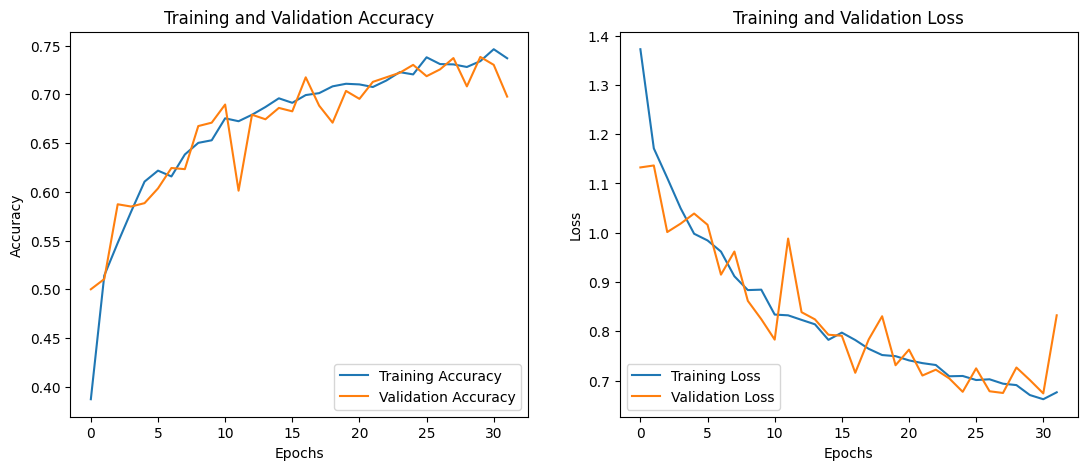

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))

# Plot the accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.savefig('Accuracy_loss.png')
plt.show()

14/14 [==============================] - 1s 59ms/step


/Users/samchen/miniconda3/envs/tf/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:743: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


ValueError: could not broadcast input array from shape (22,64,64,3) into shape (22,)

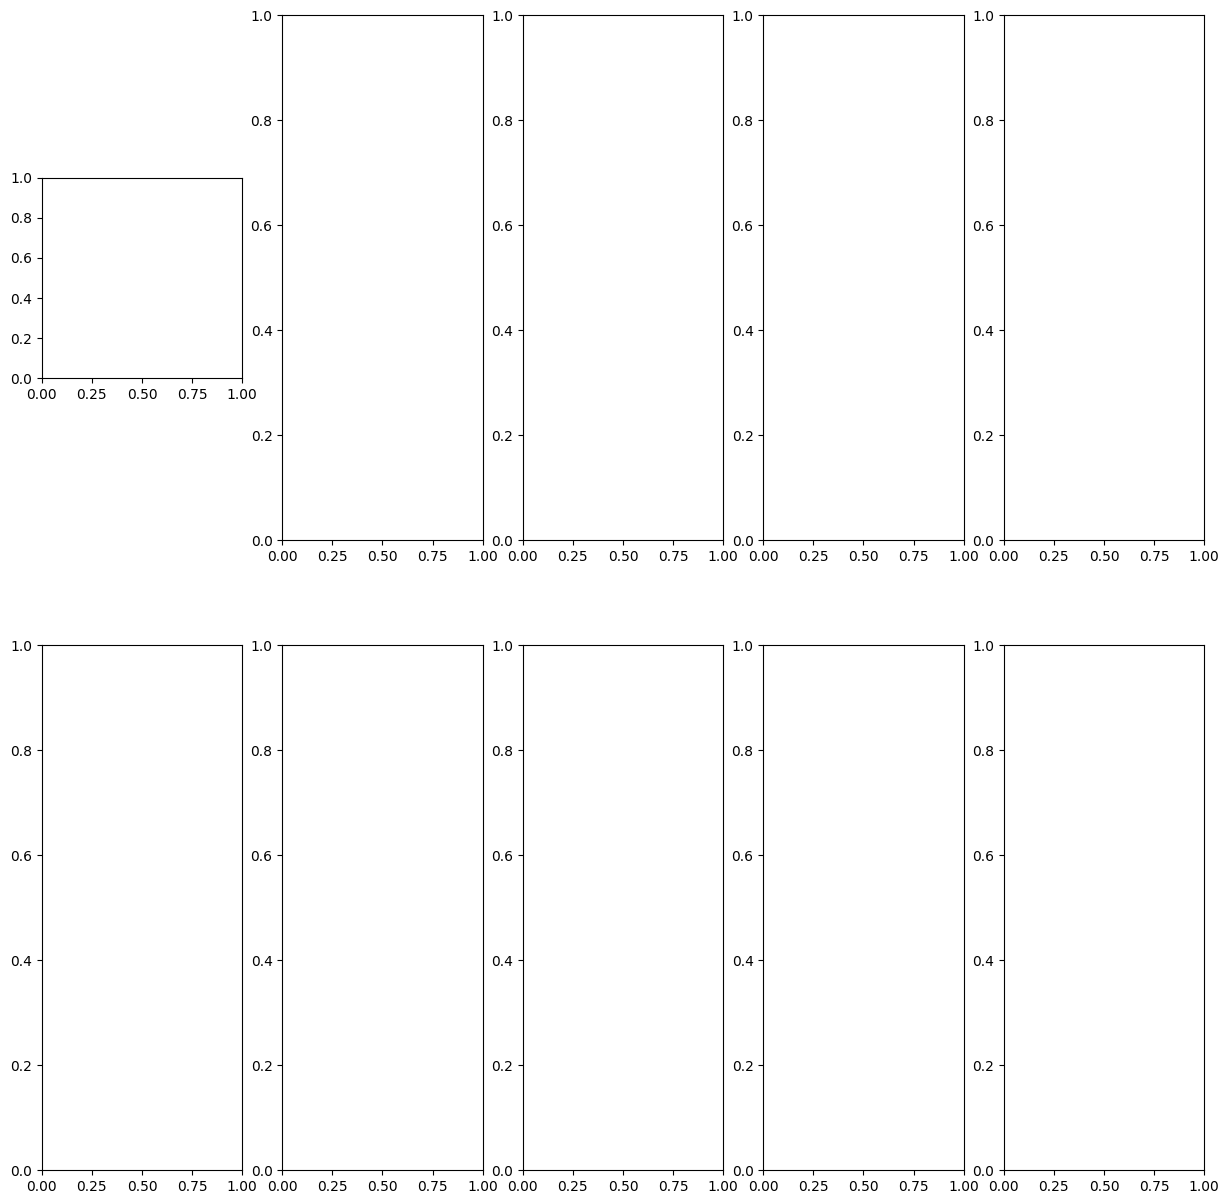

In [29]:
import numpy as np
import random

pred = cnn.predict(final_set)
pred_digits=np.argmax(pred,axis=1)

pred_lbls = []
for i in pred_digits:
    if (i == 4):
        pred_lbls.append('tulip')
    elif (i == 3):
        pred_lbls.append('sunflower')
    elif (i == 2):
        pred_lbls.append('rose')
    elif (i == 1):
        pred_lbls.append('dendelion')
    elif (i == 0):
        pred_lbls.append('daisy')

# Random pick prediction result
fig,ax=plt.subplots(2,5)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):    
        l = random.randint(0,len(final_set))
        # Show origin 
        ax[i,j].imshow(final_set[l])
        # ax[i,j].set_title('Answer: '+ lbls[l]+ '\n Prediction: ' + pred_lbls[l])
        # if (lbls[l] != pred_lbls[l]):
        #     print('Incorrect')
        # else:
        #     print('-> Correct!!')

#plt.tight_layout()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

pred = cnn.predict(final_set)
pred_digits=np.argmax(pred,axis=1)

lbls = []
for i in test_labels:
    if all(i == [0.,0.,0.,0.,1.]):
        lbls.append(4)
    elif all(i == [0.,0.,0.,1.,0.]):
        lbls.append(3)
    elif all(i == [0.,0.,1.,0.,0.]):
        lbls.append(2)
    elif all(i == [0.,1.,0.,0.,0.]):
        lbls.append(1)
    elif all(i == [1.,0.,0.,0.,0.]):
        lbls.append(0)

print(confusion_matrix(lbls,pred_digits))
print(classification_report(lbls,pred_digits))

 1/14 [=>............................] - ETA: 3s

2023-03-20 22:31:37.414451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 57ms/step


NameError: name 'test_labels' is not defined

In [ ]:
pred_digits

array([3, 3, 1, 0, 1, 4, 4, 1, 3, 0, 0, 0, 0, 4, 4, 1, 4, 0, 3, 0, 4, 3,
       4, 0, 1, 0, 0, 4, 0, 4, 2, 3, 0, 3, 0, 3, 3, 3, 3, 4, 1, 3, 4, 1,
       4, 2, 4, 4, 4, 4, 0, 0, 3, 2, 4, 0, 2, 3, 4, 4, 1, 3, 3, 2, 0, 2,
       3, 2, 4, 0, 4, 3, 2, 1, 2, 0, 1, 2, 4, 1, 4, 1, 1, 1, 4, 0, 2, 2,
       1, 3, 1, 0, 2, 1, 4, 1, 3, 3, 3, 2, 0, 4, 3, 1, 2, 1, 0, 3, 1, 3,
       0, 2, 4, 2, 0, 1, 0, 0, 4, 3, 2, 2, 2, 2, 3, 3, 3, 3, 0, 1, 4, 3,
       0, 0, 3, 0, 3, 1, 2, 2, 3, 3, 2, 0, 1, 0, 4, 4, 2, 1, 2, 2, 1, 3,
       4, 3, 3, 1, 3, 2, 2, 1, 3, 0, 1, 3, 4, 0, 2, 1, 1, 2, 2, 1, 3, 2,
       1, 1, 0, 3, 0, 3, 1, 1, 4, 2, 2, 4, 0, 0, 1, 1, 4, 0, 2, 1, 0, 3,
       3, 4, 4, 4, 1, 4, 1, 4, 0, 1, 0, 3, 4, 3, 3, 0, 0, 3, 4, 4, 3, 2,
       4, 2, 4, 3, 3, 3, 4, 0, 2, 2, 4, 1, 4, 3, 1, 1, 0, 2, 4, 3, 3, 2,
       2, 2, 0, 4, 4, 0, 2, 3, 1, 2, 3, 1, 0, 3, 0, 3, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 3, 4, 1, 0, 1, 1, 0, 3, 3, 3, 3, 1, 3, 2, 4, 1, 4,
       2, 1, 4, 3, 4, 1, 4, 4, 1, 3, 1, 1, 4, 0, 1,